#### The Real Problem

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

#### Business Domain Value

In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams.

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

#### Project Description

In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.

Details about the data and dataset files are given in below link, https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

Pre-Processing, Data Visualization and EDA 

● Exploring the given Data files ● Understanding the structure of data ● Missing points in data ● Finding inconsistencies in the data ● Visualizing different patterns ● Visualizing different text features ● Dealing with missing values ● Text preprocessing ● Creating word vocabulary from the corpus of report text data ● Creating tokens as required 

Model Building 

 Building a model architecture which can classify.  Trying different model architectures by researching state of the art for similar tasks.  Train the model  To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

Test the Model, Fine-tuning and Repeat 

● Test the model and report as per evaluation metrics ● Try different models ● Try different evaluation metrics ● Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them ● Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

### Import necessary libraries

In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings("ignore")

## Pre-Processing, Data Visualization and EDA

### Loading and Exploring Data File

In [374]:
read_file = pd.read_excel ("input_data.xlsx")
read_file.to_csv ("input_data.csv", index = None, header=True)
df = pd.read_csv("input_data.csv", encoding='utf-8')

In [375]:
#check the head of the dataset
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [376]:
#check the tail of the dataset
df.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


### Understanding Structure of Data

In [377]:
df.shape

(8500, 4)

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


#### Inferences


* This is a multi class classification Problem.
* Features are 'Description' , 'Short Description' and 'Caller' with Taget Variable is 'Assignment Group'having multipl classes.
* There are 4 columns - all of string format.
* There are 8500 rows - Few proportion of missing values can be observed in Description and Short Description.
* There are multiple languages used in description and short description and this needs to handled in pre processing.

#### Dropping Feature 'Caller' as this is unique and wont be useful for modeling

In [379]:
df_incidents = df.drop('Caller',axis=1)

In [380]:
# Reviewing number of unique values in target class 'Assignment Group'
df_incidents['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

Target Variable - 'Assignment Group' has 74 different classes

In [381]:
# Reviewing number of tickets on each class
df_incidents['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_62      25
GRP_48      25
GRP_23      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_49       6
GRP_46       6
GRP_59       6
GRP_43       5
GRP_66       4
GRP_32       4
GRP_68       3
GRP_63       3
GRP_38       3
GRP_58       3
GRP_56       3
GRP_57       2
GRP_54       2
GRP_69       2
GRP_71    

In [385]:
# Reviewing Proportions for Top 10 Groups based on incident
df_incidents['Assignment group'].value_counts(normalize = True).head(10)

GRP_0     0.467765
GRP_8     0.077765
GRP_24    0.034000
GRP_12    0.030235
GRP_9     0.029647
GRP_2     0.028353
GRP_19    0.025294
GRP_3     0.023529
GRP_6     0.021647
GRP_13    0.017059
Name: Assignment group, dtype: float64

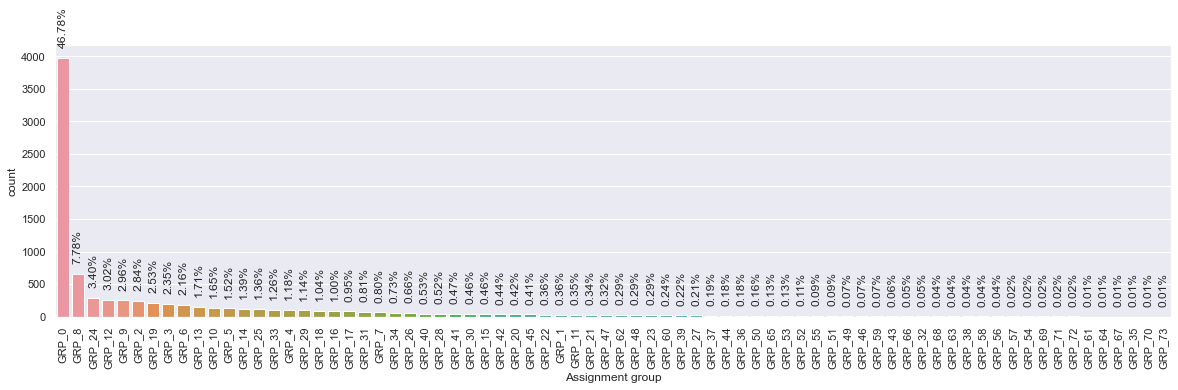

In [386]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

#### Inferences


* This is a imbalanced dataset, with majority of incidents are from Group 0 - 47%
* There are few classes which just have less incidents - To build an effective model, we need to have siginificant number of incidents (we may need to drop classes having less incidents - say less than 100 tickets)

#### Lets review distribution of tickets across various bins 

In [389]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

,Description,Ticket Count
0,1 ticket,6
1,2-5 ticket,13
2,6-10 ticket,6
3,11-20 ticket,9
4,21-50 ticket,16
5,51-100 ticket,9
6,>100 ticket,15


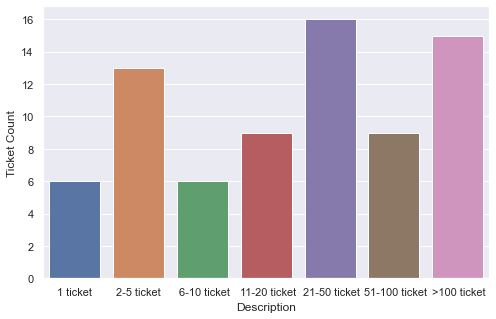

In [393]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Description", y="Ticket Count", data=df_bins);

#### Inferences


* There are 6 Assignment groups with only 1 ticket
* There are 13 assignemnt groups with only 13 ticket
* There are 6 Assignment group between 6-10 ticket
* Only 20% of Assignment Groups have more than 100 tickets

In [394]:
df_incidents_level = df_incidents.copy()

In [395]:
df_incidents_level.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


### Insights on Tickets based on Teams - L1/L2 vs L3/Functional

Based on analysis on descriptions/short description it can bse observed that 'Group 0' belong to L1/L2 tickets and rest belongs to L3/Functional tickets 

In [396]:
df_incidents_level.loc[df_incidents_level['Assignment group'] != 'GRP_0','Incident_Type'] = 'L3/Functional'
df_incidents_level.loc[df_incidents_level['Assignment group'] == 'GRP_0','Incident_Type'] = 'L1/L2'

In [397]:
df_incidents_level.head()

,Short description,Description,Assignment group,Incident_Type
0,login issue,-verified user details.(employee# & manager na...,GRP_0,L1/L2
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,L1/L2
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,L1/L2
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,L1/L2
4,skype error,skype error,GRP_0,L1/L2


In [398]:
df_incidents_level['Incident_Type'].value_counts(normalize = 'True')

L3/Functional    0.532235
L1/L2            0.467765
Name: Incident_Type, dtype: float64

<AxesSubplot:xlabel='Incident_Type', ylabel='count'>

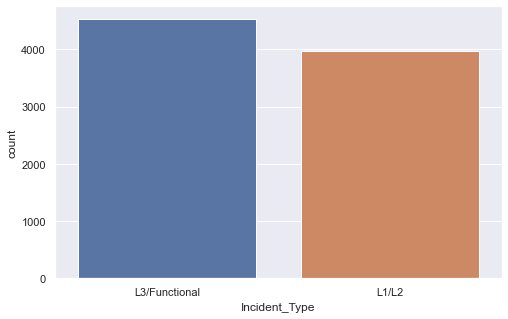

In [399]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(8,5))
sns.countplot(x="Incident_Type", data=df_incidents_level, order=df_incidents_level["Incident_Type"].value_counts().index)

#### Inferences


* Proportion of L1/L2 tickets is ~47%
* Proportion of L3/Functional tickets is ~53%

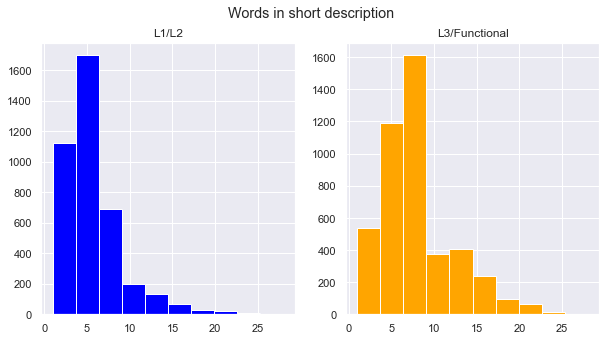

In [400]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Incident_Type']=='L1/L2']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax1.hist(text_len.dropna(),color='blue')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Incident_Type']=='L3/Functional']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax2.hist(text_len.dropna(),color='orange')
ax2.set_title('L3/Functional')
fig.suptitle('Words in short description')
plt.show()

It can be observed that L3/Functional tickets will have more words in short description compared to L1/L2 tickets

### Handling Missing Values

In [403]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


There are 8 null values for 'Short Description' and 1 null value for 'Description'

In [404]:
df_incidents[df_incidents['Short description'].isnull()]

,Short description,Description,Assignment group
2604,NaN,_x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...,GRP_34
3383,NaN,_x000D_\n-connected to the user system using t...,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3910,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3915,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3921,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,_x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...,GRP_0


In [405]:
df_incidents[df_incidents['Description'].isnull()]

,Short description,Description,Assignment group
4395,i am locked out of skype,NaN,GRP_0


Lets replace Null with empty values and join 'Description' and 'Short Description' and create a ne feature 'New Description'

In [407]:
#Replace NaN values in Short Description and Description columns
df_incidents['Short description'] = df_incidents['Short description'].replace(np.nan, '', regex=True)
df_incidents['Description'] = df_incidents['Description'].replace(np.nan, '', regex=True)

In [408]:
#Concatenate Short Description and Description columns
df_incidents['New_Description'] = df_incidents['Short description'] + ' ' +df_incidents['Description']

In [409]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error


In [410]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Assignment group   8500 non-null   object
 3   New_Description    8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


Now there are no missing values

It can be observed that there are descriptions in multiple languages. Lets anlayse different languages used

In [411]:
from langdetect import detect
    
def fn_lan_detect(df):                                        
    try:                                                          
        return detect(df)                                      
    except:                                                       
        return 'no'                                                  

df_incidents['language'] = df_incidents['New_Description'].apply(fn_lan_detect)

In [412]:
df_incidents["language"].value_counts()

en    7086
de     390
af     266
it     126
fr     120
sv      80
no      75
da      71
nl      63
es      47
ca      45
pl      29
pt      21
tl      11
ro      11
sq       9
sl       8
cy       7
tr       7
hr       7
et       6
fi       4
id       3
so       2
cs       2
lt       2
lv       1
sk       1
Name: language, dtype: int64

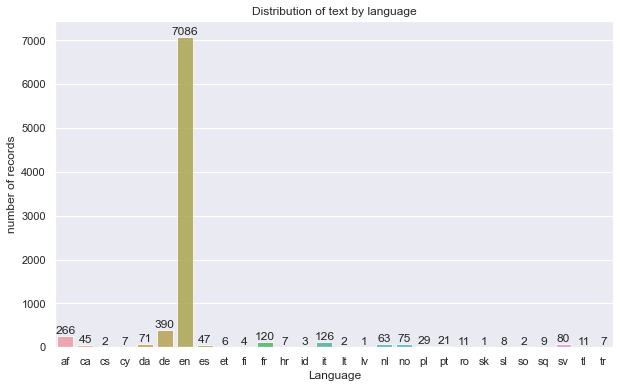

In [413]:
x = df_incidents["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [414]:
import googletrans
from googletrans import Translator

In [415]:
# Function to translate the text to english.
def fn_translate(df,lang):
    try:
        if lang == 'en':
            return df
        else:
            return translator.translate(df).text
    except:
        return df
    
    
df_incidents['English_Description'] = df_incidents.apply(lambda x: fn_translate(x['New_Description'], x['language']), axis=1)

In [416]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,en,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,en,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error


In [417]:
import string
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords

In [418]:
### Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace('_x000D_','')    
    text=text.replace('?','')
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('regards', '')

    text = re.sub(r'\S+@\S+', '', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\S+@\S+', '', text)

    text = text.lower()
    return text

In [419]:
df_incidents['Cleaned_Text'] = df_incidents['English_Description'].apply(lambda x: clean_text(x))

In [420]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description,Cleaned_Text
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...,login issue verified user detailsemployee man...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,en,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook teammy meetingsskype meetings etc ar...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,en,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn i cannot log on to vpn
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...,unable to access hrtool page unable to access ...
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error,skype error skype error


In [421]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df_incidents['Cleaned_Text'] = df_incidents['Cleaned_Text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df_incidents['Cleaned_Text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    login issue verified user detailsemployee mana...
1    outlook teammy meetingsskype meetings etc appe...
2                          cant log vpn cannot log vpn
3    unable access hrtool page unable access hrtool...
4                              skype error skype error
Name: Cleaned_Text, dtype: object

In [422]:
## Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
df_incidents['Cleaned_Text']= df_incidents['Cleaned_Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
df_incidents['Cleaned_Text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\venky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    login issue verified user detailsemployee mana...
1    outlook teammy meetingsskype meeting etc appea...
2                          cant log vpn cannot log vpn
3    unable access hrtool page unable access hrtool...
4                              skype error skype error
Name: Cleaned_Text, dtype: object

In [423]:
# Defining WorkCloud function
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

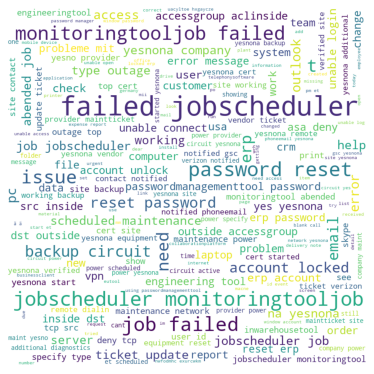

In [424]:
from wordcloud import WordCloud, STOPWORDS 


wordcloud = f_word_cloud(df_incidents['Cleaned_Text'])
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

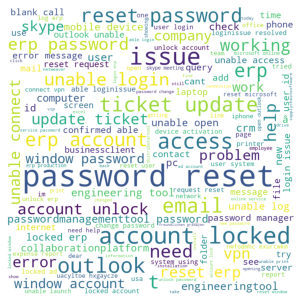

In [425]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_0'].Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (4, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

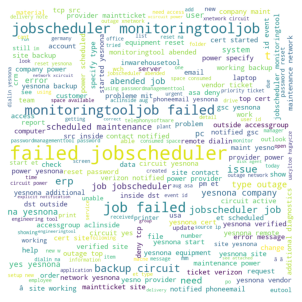

In [426]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']!='GRP_0'].Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (4, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [427]:
wd_counts = Counter()
for i, row in df_incidents.iterrows():
    wd_counts.update(row['Cleaned_Text'].split())
    
wd_counts.most_common(20)

[('password', 2169),
 ('erp', 1955),
 ('jobscheduler', 1928),
 ('failed', 1729),
 ('yesnona', 1568),
 ('reset', 1528),
 ('user', 1523),
 ('unable', 1487),
 ('t', 1428),
 ('issue', 1275),
 ('account', 1241),
 ('job', 1226),
 ('access', 1128),
 ('error', 988),
 ('need', 908),
 ('company', 880),
 ('ticket', 863),
 ('outlook', 861),
 ('working', 823),
 ('site', 799)]

In [428]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdIdfVec = TfidfVectorizer(min_df=5, use_idf=True, stop_words=None,lowercase=False)

In [429]:
text = tdIdfVec.fit_transform(df_incidents.Cleaned_Text)

In [430]:
tf_matrix = text.toarray()

In [431]:
vocab = tdIdfVec.get_feature_names()

In [432]:
tf_df = pd.DataFrame(np.round(tf_matrix, 2), columns=vocab)

In [433]:
tf_df.head()

ab  abap  abend  abended  aber  ability  able  aborted  absender  \
0  0.0   0.0    0.0      0.0   0.0      0.0  0.17      0.0       0.0   
1  0.0   0.0    0.0      0.0   0.0      0.0  0.00      0.0       0.0   
2  0.0   0.0    0.0      0.0   0.0      0.0  0.00      0.0       0.0   
3  0.0   0.0    0.0      0.0   0.0      0.0  0.00      0.0       0.0   
4  0.0   0.0    0.0      0.0   0.0      0.0  0.00      0.0       0.0   

   absolutely   ac  accept  accepted  accepting  acces  access  accessgroup  \
0         0.0  0.0     0.0       0.0        0.0    0.0    0.00          0.0   
1         0.0  0.0     0.0       0.0        0.0    0.0    0.00          0.0   
2         0.0  0.0     0.0       0.0        0.0    0.0    0.00          0.0   
3         0.0  0.0     0.0       0.0        0.0    0.0    0.38          0.0   
4         0.0  0.0     0.0       0.0        0.0    0.0    0.00          0.0   

   accessing  accordingly  account  accountadvised  accounting  acct  ack  \
0        0.0          0.0      0.0             0.0         0.0   0.0  0.0   
1        0.0          0.0      0.0             0.0         0.0   0.0  0.0   
2        0.0          0.0      0.0             0.0         0.0   0.0  0.0   
3        0.0          0.0      0.0             0.0         0.0   0.0  0.0   
4        0.0          0.0      0.0             0.0         0.0   0.0  0.0   

   aclinside  across  action  activate  activated  activation  active  \
0        0.0     0.0     0.0       0.0        0.0         0.0     0.0   
1        0.0     0.0     0.0       0.0        0.0         0.0     0.0   
2        0.0     0.0     0.0       0.0        0.0         0.0     0.0   
3        0.0     0.0     0.0       0.0        0.0         0.0     0.0   
4        0.0     0.0     0.0       0.0        0.0         0.0     0.0   

   activesync  activity  actual  actually    ad  adapter  add  added  addin  \
0         0.0       0.0     0.0       0.0  0.22      0.0  0.0    0.0    0.0   
1         0.0       0.0     0.0       0.0  0.00      0.0  0.0    0.0    0.0   
2         0.0       0.0     0.0       0.0  0.00      0.0  0.0    0.0    0.0   
3         0.0       0.0     0.0       0.0  0.00      0.0  0.0    0.0    0.0   
4         0.0       0.0     0.0       0.0  0.00      0.0  0.0    0.0    0.0   

   adding  addition  additional  address  addressed  admin  administration  \
0     0.0       0.0         0.0      0.0        0.0    0.0             0.0   
1     0.0       0.0         0.0      0.0        0.0    0.0             0.0   
2     0.0       0.0         0.0      0.0        0.0    0.0             0.0   
3     0.0       0.0         0.0      0.0        0.0    0.0             0.0   
4     0.0       0.0         0.0      0.0        0.0    0.0             0.0   

   administrator  adobe  adressaten  advance  advice  advise  advised  \
0            0.0    0.0         0.0      0.0     0.0     0.0      0.0   
1            0.0    0.0         0.0      0.0     0.0     0.3      0.0   
2            0.0    0.0         0.0      0.0     0.0     0.0      0.0   
3            0.0    0.0         0.0      0.0     0.0     0.0      0.0   
4            0.0    0.0         0.0      0.0     0.0     0.0      0.0   

   advisevkzwafuh   ae  aerp  affected  africa  afternoon  afternooni  agent  \
0             0.0  0.0   0.0       0.0     0.0        0.0         0.0    0.0   
1             0.0  0.0   0.0       0.0     0.0        0.0         0.0    0.0   
2             0.0  0.0   0.0       0.0     0.0        0.0         0.0    0.0   
3             0.0  0.0   0.0       0.0     0.0        0.0         0.0    0.0   
4             0.0  0.0   0.0       0.0     0.0        0.0         0.0    0.0   

   agentid  ago  agreement  alarm  alert  alerting  alicona  allcan  alle  \
0      0.0  0.0        0.0    0.0    0.0       0.0      0.0     0.0   0.0   
1      0.0  0.0        0.0    0.0    0.0       0.0      0.0     0.0   0.0   
2      0.0  0.0        0.0    0.0    0.0       0.0      0.0     0.0   0.0   
3      0.0  0.0       

In [434]:
tf_df.columns

Index(['ab', 'abap', 'abend', 'abended', 'aber', 'ability', 'able', 'aborted',
       'absender', 'absolutely',
       ...
       'šä', 'šçÿ', 'šçš', 'šé', 'žä', 'žæ', 'žæž', 'žé', 'ˆã', 'ˆå'],
      dtype='object', length=2447)

In [435]:
print(tf_df.shape)

(8500, 2447)


In [436]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_incidents['token_desc'] = df_incidents['Cleaned_Text'].apply(lambda x: tokenizer.tokenize(x))

In [437]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description,Cleaned_Text,token_desc
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...,login issue verified user detailsemployee mana...,"[login, issue, verified, user, detailsemployee..."
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,en,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook teammy meetingsskype meeting etc appea...,"[outlook, teammy, meetingsskype, meeting, etc,..."
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,en,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log vpn cannot log vpn,"[cant, log, vpn, cannot, log, vpn]"
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...,unable access hrtool page unable access hrtool...,"[unable, access, hrtool, page, unable, access,..."
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error,skype error skype error,"[skype, error, skype, error]"


In [438]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf for ticket
tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(df_incidents['Cleaned_Text'])

In [439]:
len(inc_tfidf.todense())

8500

In [440]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [441]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
erp,3.110625
job,3.117444
password,3.137188
jobscheduler,3.170643
failed,3.271432
unable,3.276004
reset,3.286366
issue,3.291007
failed jobscheduler,3.350905
monitoringtooljob,3.380982


In [442]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(20)

,tfidf
dst outside,7.968498
outside accessgroup,7.968498
deny tcp,7.745354
tcp src,7.745354
src inside,7.563032
src,7.563032
accessgroup,7.563032
accessgroup aclinside,7.563032
aclinside,7.563032
asa deny,7.563032


In [443]:
#tf-idf array into pandas dataframe
#collect the tfid matrix in numpy array
array = inc_tfidf.todense()

# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
df_inc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,0.0,0.0,0.234523,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.309025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.454688,0.0,0.0,0.0,0.0,0.0,0.0,0.266293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.26864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.586013,0.0,0.0,0.0,0.0,0.291158,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303057,0.349977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.628139,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0

In [444]:
df_inc['Assignment_Group'] = df_incidents['Assignment group']

In [486]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve,confusion_matrix, f1_score

In [487]:
from time import time
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return  (time()-self.start_ts)
    
timer = Timer()

# A method to train and test the model
def run_classification(modelType, estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('accuracy %s' % accuracy_score(y_pred, y_test)) 
    print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    #print(timer.stop(), 'to run the model')
    
    dict_results = {"Algorithm": modelType,
                         "Train Accuracy Score": round(metrics.accuracy_score(y_train, y_train_pred.round()) * 100,2),
                         "Test Accuracy Score": round(metrics.accuracy_score(y_test, y_pred.round()) * 100,2),
                         "Train Recall Score":round((metrics.recall_score(y_train, y_train_pred.round(),average='weighted')) * 100,2),
                         "Test Recall Score":round((metrics.recall_score(y_test, y_pred.round(),average='weighted')) * 100,2),
                         "Train Precision":round((metrics.precision_score(y_train, y_train_pred.round(),average='weighted')) * 100,2),
                         "Test Precision":round((metrics.precision_score(y_test, y_pred.round(),average='weighted')) * 100,2),    
                         "Time Taken in seconds": timer.stop()
                       }
    return pd.Series(dict_results).to_frame().T

In [488]:
# Filtering classes having less than 100 tickets to create an effective model
df_incidents_filtered = df_incidents[df_incidents['Assignment group'].map(df_incidents['Assignment group'].value_counts()) > 100]
x = df_incidents_filtered['Cleaned_Text']
y = df_incidents_filtered['Assignment group']

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)


log_cols=["Classifier", "accuracy","f1_score"]
log = pd.DataFrame(columns=log_cols)
df_score = pd.DataFrame(columns= ['Algorithm', "Train Accuracy Score", "Test Accuracy Score", "Train Recall Score", "Test Recall Score", "Train Precision", "Test Precision","Time Taken in seconds"])

In [489]:
df_score = pd.concat([df_score,run_classification('Naive_Bayes',MultinomialNB(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
Training accuracy: 68.55%
Testing accuracy: 67.92%
accuracy 0.6792318634423897
f1 score 0.7874951306934366
Confusion matrix:
 [[795   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 17   0   0   0   0   0   0   0   0   0   0   0   0  11   0]
 [ 35   0   9   0   0   0   1   0   0   0   0   0   0   7   0]
 [ 28   0   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [ 21   0   2   0   0   0   0   0   0   0   0   0   0   1   0]
 [ 43   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 43   0   0   0   0   0   5   0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0  24   0   0   0   0   0   0   0]
 [ 23   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 39   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [ 19   0   0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0  

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,68.55,67.92,68.55,67.92,60.76,56.29,0.205046


In [490]:
df_score = pd.concat([df_score,run_classification('KNN',KNeighborsClassifier(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Training accuracy: 73.99%
Testing accuracy: 70.84%
accuracy 0.7083926031294452
f1 score 0.7376831387121967
Confusion matrix:
 [[791   0   1   0   0   0   0   0   0   2   0   0   0   1   0]
 [ 11   5   0   0   0   0   0   0   0   0   0  10   1   1   0]
 [ 20   0  21   0   3   1   1   0   0   0   1   4   0   1   0]
 [ 14   2   0  10   0   0   0   0   0   0   0   1   2   0   0]
 [ 14   0   3   0   5   0   1   0   0   0   0   1   0   0   0]
 [ 38   0   0   0   0   4   0   0   0   1   0   0   0   0   0]
 [ 30   0   0   0   0   0  18   0   0   0   0   0   0   0   0]
 [ 13   0   2   0   0   0   0  40   0   1   2   0   0   0   0]
 [ 17   0   0   0   0   1   0   0   5   0   0   0   0   0   0]
 [ 29   0   0   0   0   3   1   0   0   7   0   0   0   0   0]
 [ 13   0   0   0   0   0   0   2   0   0   6   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,68.55,67.92,68.55,67.92,60.76,56.29,0.205046
0,KNN,73.99,70.84,73.99,70.84,81.73,75.8,1.088435


In [491]:
df_score = pd.concat([df_score,run_classification('SVC',LinearSVC(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Training accuracy: 91.39%
Testing accuracy: 78.59%
accuracy 0.7859174964438123
f1 score 0.8158559424169306
Confusion matrix:
 [[772   0   6   1   0   6   4   0   1   3   1   0   1   0   0]
 [  7   9   0   0   0   0   0   0   0   0   0   0   1  11   0]
 [ 11   0  28   0   3   1   1   1   0   2   0   0   0   5   0]
 [  8   2   0  16   0   0   0   0   0   0   0   0   2   1   0]
 [ 13   0   2   0   7   0   1   0   0   0   0   0   0   1   0]
 [ 26   0   0   0   0  15   0   0   0   2   0   0   0   0   0]
 [ 22   0   1   0   0   0  25   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0  53   0   0   1   0   0   0   0]
 [  9   0   0   0   0   0   1   1  12   0   0   0   0   0   0]
 [ 19   0   0   0   0   5   1   0   0  15   0   0   0   0   0]
 [ 10   0   1   0   0   0   0   3   0   0   7   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   1   0   0   0  

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,68.55,67.92,68.55,67.92,60.76,56.29,0.205046
0,KNN,73.99,70.84,73.99,70.84,81.73,75.8,1.088435
0,SVC,91.39,78.59,91.39,78.59,94.06,77.57,0.294212


In [492]:
df_score = pd.concat([df_score,run_classification('Decision Tree',DecisionTreeClassifier(), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 93.24%
Testing accuracy: 72.62%
accuracy 0.7261735419630156
f1 score 0.7492638727248792
Confusion matrix:
 [[714   3  11   6   1  13   9   6   6  11   4   0   1   5   5]
 [  4   7   0   3   2   0   0   0   0   1   0   0   0  11   0]
 [ 14   0  27   0   0   1   1   1   1   0   0   0   0   6   1]
 [  9   1   1  11   0   0   1   0   1   0   0   0   3   1   1]
 [ 10   0   4   3   3   0   1   0   0   0   0   0   0   3   0]
 [ 21   0   1   0   0  14   0   1   0   6   0   0   0   0   0]
 [ 26   0   1   0   0   0  21   0   0   0   0   0   0   0   0]
 [  3   0   1   0   0   0   0  51   1   1   1   0   0   0   0]
 [  4   0   0   2   0   0   0   2  14   0   0   0   0   1   0]
 [ 18   0   0   0   0   6   2   2   0  12   0   0   0   0   0]
 [  9   0   1   0   0   0   0   4   0   1   6   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,68.55,67.92,68.55,67.92,60.76,56.29,0.205046
0,KNN,73.99,70.84,73.99,70.84,81.73,75.8,1.088435
0,SVC,91.39,78.59,91.39,78.59,94.06,77.57,0.294212
0,Decision Tree,93.24,72.62,93.24,72.62,95.66,71.67,0.878078


In [493]:
df_score = pd.concat([df_score,run_classification('Random Forest',RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)])
df_score

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 93.24%
Testing accuracy: 74.25%
accuracy 0.7425320056899004
f1 score 0.7993044377551197
Confusion matrix:
 [[784   0   3   1   0   2   0   3   1   1   0   0   0   0   0]
 [ 11   2   0   3   0   0   0   0   0   0   0   0   1  11   0]
 [ 25   0  16   0   2   1   1   0   0   0   1   0   0   6   0]
 [ 15   3   0   9   0   0   0   0   0   0   0   0   1   1   0]
 [ 16   0   2   0   5   0   0   0   0   0   0   0   0   1   0]
 [ 38   0   0   0   0   3   0   0   0   2   0   0   0   0   0]
 [ 30   0   1   0   0   0  17   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0  51   0   1   1   0   0   0   0]
 [ 14   0   0   0   0   0   0   1   7   0   0   0   0   1   0]
 [ 31   0   0   0   0   2   1   0   0   6   0   0   0   0   0]
 [ 12   0   1   0   0   0   0   3   0   0   5   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0 

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,68.55,67.92,68.55,67.92,60.76,56.29,0.205046
0,KNN,73.99,70.84,73.99,70.84,81.73,75.8,1.088435
0,SVC,91.39,78.59,91.39,78.59,94.06,77.57,0.294212
0,Decision Tree,93.24,72.62,93.24,72.62,95.66,71.67,0.878078
0,Random Forest,93.24,74.25,93.24,74.25,95.71,73.59,3.773144


In [494]:
import xgboost as xgb
df_score = pd.concat([df_score,run_classification('XG-Boost',xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8,subsample=0.8, nthread=10, learning_rate=0.1),X_train, X_test, y_train, y_test)])
df_score

[11:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
         

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,68.55,67.92,68.55,67.92,60.76,56.29,0.205046
0,KNN,73.99,70.84,73.99,70.84,81.73,75.8,1.088435
0,SVC,91.39,78.59,91.39,78.59,94.06,77.57,0.294212
0,Decision Tree,93.24,72.62,93.24,72.62,95.66,71.67,0.878078
0,Random Forest,93.24,74.25,93.24,74.25,95.71,73.59,3.773144
0,XG-Boost,90.02,74.54,90.02,74.54,92.57,72.16,10.091995


In [495]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb # Loading Data
from tensorflow.keras.preprocessing.sequence import pad_sequences # Preprocessing

# Importing the libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Conv1D,Input, Bidirectional, LSTM, Dense, SpatialDropout1D, Input, Dropout,Embedding,Concatenate, TimeDistributed 

In [496]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each issue statement
MAX_SEQUENCE_LENGTH = 250
# Fixed attribute
EMBEDDING_DIM = 100

In [497]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each issue statement
MAX_SEQUENCE_LENGTH = 250
# Fixed attribute
EMBEDDING_DIM = 100

In [498]:
# Tokenize the issues by coverting each one to sequence of integers or into a vector
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_incidents_filtered['Cleaned_Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 13210 unique tokens.


In [499]:
# Truncate & pad the input sequences so that an uniform length is maintained for modelling
X = tokenizer.texts_to_sequences(df_incidents_filtered['Cleaned_Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (7030, 250)


In [500]:
# Convert the labels that are categorical into numbers
Y = pd.get_dummies(df_incidents_filtered['Assignment group']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (7030, 15)


In [501]:
# Splint the data into train & test with 90% and 10% hierarchy
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5624, 250) (5624, 15)
(1406, 250) (1406, 15)


In [502]:
timer = Timer()
timer.start()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
BiLSTM_MultiClsModel = Sequential()
BiLSTM_MultiClsModel.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
BiLSTM_MultiClsModel.add(SpatialDropout1D(0.2))
BiLSTM_MultiClsModel.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
BiLSTM_MultiClsModel.add(Dense(15, activation='softmax'))
BiLSTM_MultiClsModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

epochs = 5
batch_size = 64

history = BiLSTM_MultiClsModel.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[callback])
timer.stop()

Epoch 1/5
80/80 [==============================] - 118s 1s/step - loss: 1.7531 - accuracy: 0.5779 - precision_6: 0.6757 - recall_6: 0.4175 - val_loss: 1.2738 - val_accuracy: 0.6661 - val_precision_6: 0.7979 - val_recall_6: 0.5400
Epoch 2/5
80/80 [==============================] - 114s 1s/step - loss: 1.1340 - accuracy: 0.6817 - precision_6: 0.8447 - recall_6: 0.5920 - val_loss: 1.0785 - val_accuracy: 0.6892 - val_precision_6: 0.8541 - val_recall_6: 0.5613
Epoch 3/5
80/80 [==============================] - 113s 1s/step - loss: 0.9369 - accuracy: 0.7068 - precision_6: 0.9029 - recall_6: 0.6264 - val_loss: 1.0837 - val_accuracy: 0.6980 - val_precision_6: 0.8384 - val_recall_6: 0.5897
Epoch 4/5
80/80 [==============================] - 114s 1s/step - loss: 0.7903 - accuracy: 0.7500 - precision_6: 0.9288 - recall_6: 0.6392 - val_loss: 1.0313 - val_accuracy: 0.7194 - val_precision_6: 0.7917 - val_recall_6: 0.6412
Epoch 5/5
80/80 [==============================] - 114s 1s/step - loss: 0.6491 -

573.6134176254272

In [503]:
# Print the accuracies for the test set
accuracy_factor = BiLSTM_MultiClsModel.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}\n  Precision: {:0.3f}\n  Recall: {:0.3f}'.format(accuracy_factor[0], accuracy_factor[1], accuracy_factor[2], accuracy_factor[3]))

44/44 [==============================] - 8s 184ms/step - loss: 1.0503 - accuracy: 0.6927 - precision_6: 0.8916 - recall_6: 0.5676
Test set
  Loss: 1.050
  Accuracy: 0.693
  Precision: 0.892
  Recall: 0.568


In [506]:
dict_results = {"Algorithm": 'Bidirectional LSTM',
                         "Train Accuracy Score": 78.68,
                         "Test Accuracy Score": 67.50,
                         "Train Recall Score":67.20,
                         "Test Recall Score":57.50,
                         "Train Precision":92.83,
                         "Test Precision":85.20,    
                         "Time Taken in seconds": 573.61
                       }
lstm_results = pd.Series(dict_results).to_frame().T

In [507]:
df_score = pd.concat([df_score,lstm_results])
df_score

,Algorithm,Train Accuracy Score,Test Accuracy Score,Train Recall Score,Test Recall Score,Train Precision,Test Precision,Time Taken in seconds
0,Naive_Bayes,68.55,67.92,68.55,67.92,60.76,56.29,0.205046
0,KNN,73.99,70.84,73.99,70.84,81.73,75.8,1.088435
0,SVC,91.39,78.59,91.39,78.59,94.06,77.57,0.294212
0,Decision Tree,93.24,72.62,93.24,72.62,95.66,71.67,0.878078
0,Random Forest,93.24,74.25,93.24,74.25,95.71,73.59,3.773144
0,XG-Boost,90.02,74.54,90.02,74.54,92.57,72.16,10.091995
0,Bidirectional LSTM,78.68,67.5,67.2,57.5,92.83,85.2,594.9
0,Bidirectional LSTM,78.68,67.5,67.2,57.5,92.83,85.2,573.61
